# Task 4. Algorithms for unconstrained nonlinear optimization. Stochastic and metaheuristic algorithms

## Part I

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize, least_squares, dual_annealing, differential_evolution

In [2]:
np.random.seed(12)

In [3]:
xk = np.array([3 * i / 1000 for i in range(1001)])

In [4]:
def fn(x):
    return 1 / ((x ** 2) - (3 * x) + 2)

In [5]:
def gen_y(x):
    res = []
    for i in x:
        if fn(i) < -100:
            res.append(-100 + np.random.standard_normal())
        elif fn(i) > 100:
            res.append(100 + np.random.standard_normal())
        else:
            res.append(fn(i) + np.random.standard_normal())
    return res

In [6]:
yk = gen_y(xk)

In [7]:
E = 1e-3

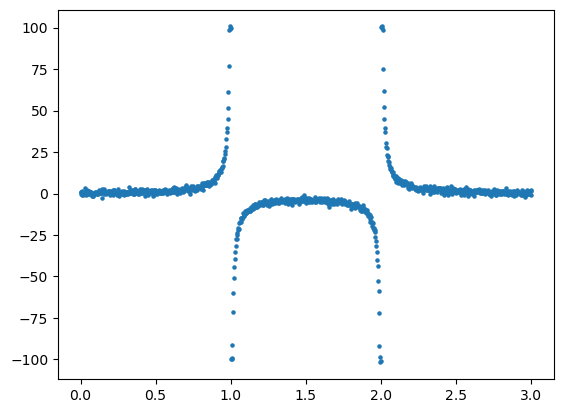

In [8]:
plt.scatter(xk, yk,s=5)

### Nelder-Mead algorithm

In [9]:
def nma():
    params = [1, 1, 1, 1]
    
    def rat(args):
        a, b, c, d = args
        temp = 0
        for i in range(1001):
            temp += (((a * xk[i] + b) /  (xk[i]**2 + c*xk[i] + d)) - yk[i]) ** 2
        return temp
    
    res = minimize(rat, params, method='Nelder-Mead', tol=E)
    return res

In [10]:
Nelder_Mead = nma()

In [11]:
Nelder_Mead

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 136963.32980410295
             x: [-9.990e-01  9.994e-01 -2.001e+00  1.001e+00]
           nit: 335
          nfev: 560
 final_simplex: (array([[-9.990e-01,  9.994e-01, -2.001e+00,  1.001e+00],
                       [-9.988e-01,  9.993e-01, -2.001e+00,  1.001e+00],
                       ...,
                       [-9.989e-01,  9.994e-01, -2.001e+00,  1.001e+00],
                       [-9.990e-01,  9.995e-01, -2.001e+00,  1.001e+00]]), array([ 1.370e+05,  1.370e+05,  1.370e+05,  1.370e+05,
                        1.370e+05]))

### Levenberg-Marquardt algorithm 

In [12]:
def rtls(args, x, y):
    a, b, c, d = args
    return ((a * x + b) /  (x**2 + c*x + d)) - y

In [13]:
def lma():
    res = least_squares(rtls,[1,1,1,1], method='lm', gtol=E, args=(xk, yk))
    return res

In [14]:
Levenberg_Marquardt = lma()

In [15]:
Levenberg_Marquardt

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 2.903e-02  1.184e+00 ...  2.189e-01 -2.890e+00]
           x: [-1.002e+00  1.003e+00 -2.001e+00  1.001e+00]
        cost: 68484.18992657092
         jac: [[ 0.000e+00  9.992e-01  0.000e+00 -1.001e+00]
               [ 3.016e-03  1.005e+00 -3.031e-03 -1.010e+00]
               ...
               [ 7.518e-01  2.509e-01  3.774e-01  1.259e-01]
               [ 7.503e-01  2.501e-01  3.761e-01  1.254e-01]]
        grad: [ 9.092e+02  1.092e+03  1.036e+08  1.525e+07]
  optimality: 103563177.65658961
 active_mask: [0 0 0 0]
        nfev: 127
        njev: None

### Dual Annealing

In [16]:
def dals(args):
    a,b,c,d = args
    temp = np.sum((((a * xk + b) /  (xk**2 + c*xk + d)) - yk) ** 2)
    return temp

In [17]:
lw = [-2] * 4
up = [2] * 4
bounds = list(zip(lw, up))

In [18]:
Dual_Annealing = dual_annealing(dals, bounds)

In [19]:
Dual_Annealing

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 137439.45789662038
       x: [-9.991e-01  9.993e-01 -2.000e+00  1.000e+00]
     nit: 1000
    nfev: 8886
    njev: 177
    nhev: 0

### Differential Evolution

In [20]:
Differential_Evolution = differential_evolution(dals, bounds)

In [21]:
Differential_Evolution

 message: Optimization terminated successfully.
 success: True
     fun: 260565.26448065275
       x: [-1.612e+00  1.695e+00 -1.979e+00  1.037e+00]
     nit: 6
    nfev: 575

### Particle Swarm Optimization

In [22]:
import pyswarms as ps

In [23]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

In [24]:
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=4, options=options)

In [25]:
count = 0

In [26]:
def psols(args):
    global count
    res = []
    for i in args:
        a,b,c,d = i
        temp = np.sum((((a * xk + b) /  (xk**2 + c*xk + d)) - yk) ** 2)
        res.append(temp)
        count += 1
    return res

In [27]:
PSO = optimizer.optimize(psols, iters=100)

2023-09-29 10:48:58,257 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████|100/100, best_cost=2.53e+5
2023-09-29 10:48:59,420 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 252714.6707052827, best pos: [-1.17461369  1.17479941 -2.15815062  1.17132426]


In [28]:
PSO

(252714.6707052827,
 array([-1.17461369,  1.17479941, -2.15815062,  1.17132426]))

#### Visualize

In [29]:
def rtls(x,a,b,c,d):
    return (a * x + b) / (x**2 + c*x + d)

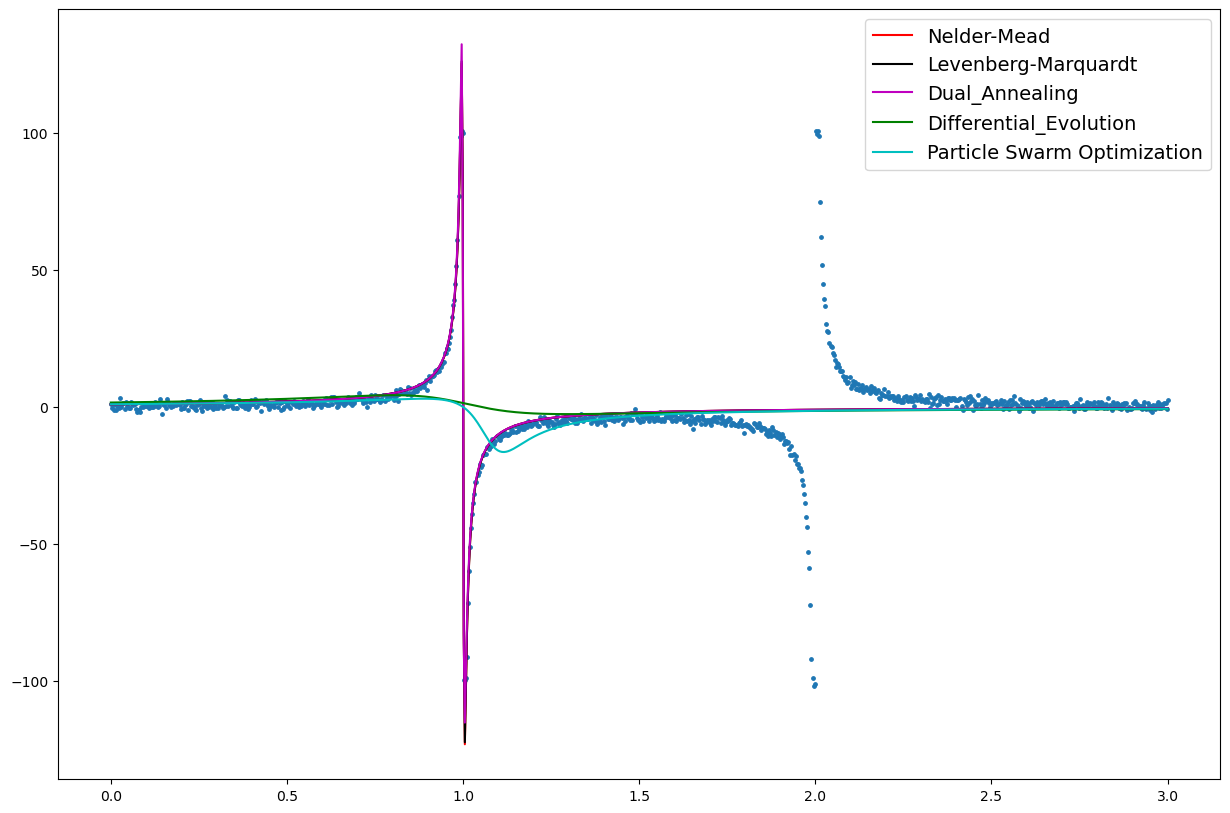

In [41]:
plt.figure(figsize=(15,10))
plt.scatter(xk, yk, s=6)
plt.plot(xk, rtls(xk, *Nelder_Mead.x), 'r', label='Nelder-Mead')
plt.plot(xk, rtls(xk, *Levenberg_Marquardt.x), 'k', label='Levenberg-Marquardt')
plt.plot(xk, rtls(xk, *Dual_Annealing.x), 'm', label='Dual_Annealing')
plt.plot(xk, rtls(xk, *Differential_Evolution.x), 'g', label='Differential_Evolution')
plt.plot(xk, rtls(xk, *PSO[1]), 'c', label='Particle Swarm Optimization')
plt.legend(fontsize=14)

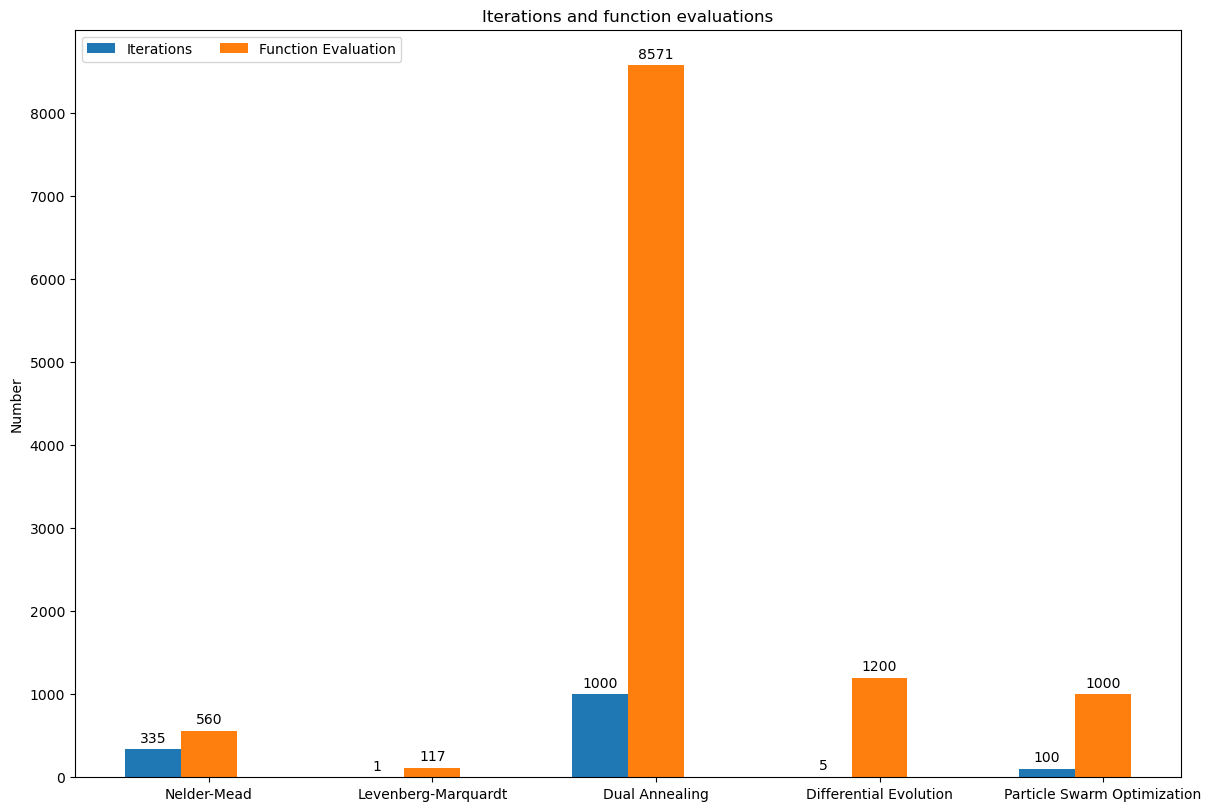

In [31]:
species = ('Nelder-Mead', 'Levenberg-Marquardt', 'Dual Annealing', 'Differential Evolution', 'Particle Swarm Optimization')
it_fev = {
    'Iterations': (335, 1, 1000, 5, 100),
    'Function Evaluation': (560, 117, 8571, 1200, 1000)
}
x = np.arange(len(species))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12, 8))
for attribute, measurement in it_fev.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Number')
ax.set_title('Iterations and function evaluations')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)

## Part II

Distance matrix

|        | **1** | **2** | **3** | **4** | **5** | **6** | **7** | **8** | **9** | **10** | **11** | **12** | **13** | **14** | **15** |
|:------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:------:|:------:|:------:|:------:|:------:|:------:|
|  **1** |   0   |   29  |   82  |   46  |   68  |   52  |   72  |   42  |   51  |   55   |   29   |   74   |   23   |   72   |   46   |
|  **2** |   29  |   0   |   55  |   46  |   42  |   43  |   43  |   23  |   23  |   31   |   41   |   51   |   11   |   52   |   21   |
|  **3** |   82  |   55  |   0   |   68  |   46  |   55  |   23  |   43  |   41  |   29   |   79   |   21   |   64   |   31   |   51   |
|  **4** |   46  |   46  |   68  |   0   |   82  |   15  |   72  |   31  |   62  |   42   |   21   |   51   |   51   |   43   |   64   |
|  **5** |   68  |   42  |   46  |   82  |   0   |   74  |   23  |   52  |   21  |   46   |   82   |   58   |   46   |   65   |   23   |
|  **6** |   52  |   43  |   55  |   15  |   74  |   0   |   61  |   23  |   55  |   31   |   33   |   37   |   51   |   29   |   59   |
|  **7** |   72  |   43  |   23  |   72  |   23  |   61  |   0   |   42  |   23  |   31   |   77   |   37   |   51   |   46   |   33   |
|  **8** |   42  |   23  |   43  |   31  |   52  |   23  |   42  |   0   |   33  |   15   |   37   |   33   |   33   |   31   |   37   |
|  **9** |   51  |   23  |   41  |   62  |   21  |   55  |   23  |   33  |   0   |   29   |   62   |   46   |   29   |   51   |   11   |
| **10** |   55  |   31  |   29  |   42  |   46  |   31  |   31  |   15  |   29  |    0   |   51   |   21   |   41   |   23   |   37   |
| **11** |   29  |   41  |   79  |   21  |   82  |   33  |   77  |   37  |   62  |   51   |    0   |   65   |   42   |   59   |   61   |
| **12** |   74  |   51  |   21  |   51  |   58  |   37  |   37  |   33  |   46  |   21   |   65   |    0   |   61   |   11   |   55   |
| **13** |   23  |   11  |   64  |   51  |   46  |   51  |   51  |   33  |   29  |   41   |   42   |   61   |    0   |   62   |   23   |
| **14** |   72  |   52  |   31  |   43  |   65  |   29  |   46  |   31  |   51  |   23   |   59   |   11   |   62   |    0   |   59   |
| **15** |   46  |   21  |   51  |   64  |   23  |   59  |   33  |   37  |   11  |   37   |   61   |   55   |   23   |   59   |    0   |

In [32]:
x = [0.549963e-07, -28.8733, -79.2916, -14.6577, -64.7473, -29.0585, -72.0785, -36.0366, -50.4808, -50.5859, -0.135819, -65.0866, -21.4983, -57.5687, -43.0700]
y = [0.985808e-08, -0.797739e-07, -21.4033, -43.3896, 21.8982, -43.2167, 0.181581, -21.6135, 7.37447, -21.5882, -28.7293, -36.0625, 7.31942, -43.2506, 14.5548] 

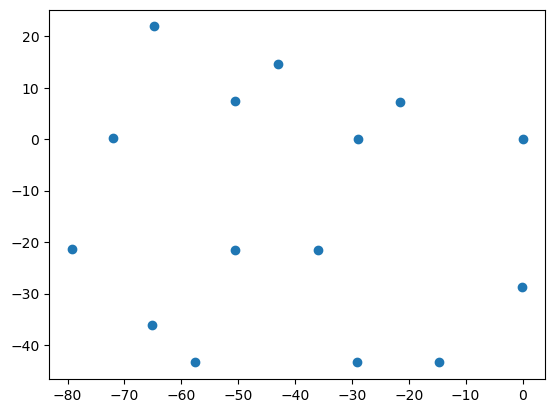

In [33]:
plt.scatter(x, y)

In [34]:
data = np.column_stack([x, y])

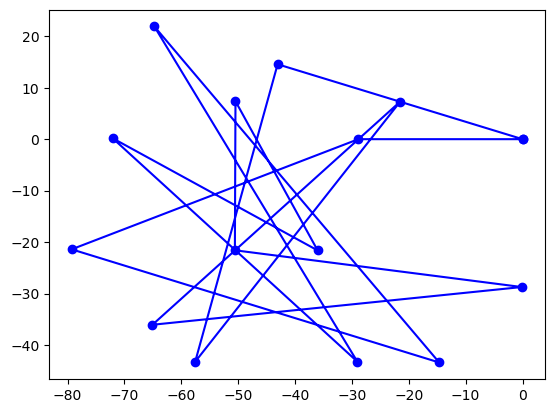

In [35]:
xl = x + [x[0]]
yl = y + [y[0]]
plt.plot(xl, yl, '-bo')

In [36]:
import matplotlib.pyplot as plt

def plotTSP(paths, points, num_iters=1):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list

    """

    # Unpack the primary TSP path and transform it into a list of ordered
    # coordinates

    x = []; y = []
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])

    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads (there should be a reasonable default for this, WTF?)
    a_scale = float(max(x))/float(100)

    # Draw the older paths, if provided
    if num_iters > 1:

        for i in range(1, num_iters):

            # Transform the old paths into a list of coordinates
            xi = []; yi = [];
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]),
                    head_width = a_scale, color = 'r',
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale,
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(min(x)*1.1, max(x)*1.1)
    plt.ylim(min(y)*1.1, max(y)*1.1 + 1)
    plt.axis([min(x) -10, max(x) + 10, min(y) - 10, max(y) + 10])
    plt.figure(figsize=(15,10))
    plt.show()

In [42]:
import math
import random

class SimAnneal(object):
    def __init__(self, coords, T=-1, alpha=-1, stopping_T=-1, stopping_iter=-1):
        self.coords = coords
        self.N = len(coords)
        self.T = math.sqrt(self.N) if T == -1 else T
        self.T_save = self.T  # save inital T to reset if batch annealing is used
        self.alpha = 0.995 if alpha == -1 else alpha
        self.stopping_temperature = 1e-8 if stopping_T == -1 else stopping_T
        self.stopping_iter = 100000 if stopping_iter == -1 else stopping_iter
        self.iteration = 1

        self.nodes = [i for i in range(self.N)]

        self.best_solution = None
        self.best_fitness = float("Inf")
        self.fitness_list = []

    def initial_solution(self):
        """
        Greedy algorithm to get an initial solution (closest-neighbour).
        """
        cur_node = random.choice(self.nodes)  # start from a random node
        solution = [cur_node]

        free_nodes = set(self.nodes)
        free_nodes.remove(cur_node)
        while free_nodes:
            next_node = min(free_nodes, key=lambda x: self.dist(cur_node, x))  # nearest neighbour
            free_nodes.remove(next_node)
            solution.append(next_node)
            cur_node = next_node

        cur_fit = self.fitness(solution)
        if cur_fit < self.best_fitness:  # If best found so far, update best fitness
            self.best_fitness = cur_fit
            self.best_solution = solution
        self.fitness_list.append(cur_fit)
        return solution, cur_fit

    def dist(self, node_0, node_1):
        """
        Euclidean distance between two nodes.
        """
        coord_0, coord_1 = self.coords[node_0], self.coords[node_1]
        return math.sqrt((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)

    def fitness(self, solution):
        """
        Total distance of the current solution path.
        """
        cur_fit = 0
        for i in range(self.N):
            cur_fit += self.dist(solution[i % self.N], solution[(i + 1) % self.N])
        return cur_fit

    def p_accept(self, candidate_fitness):
        """
        Probability of accepting if the candidate is worse than current.
        Depends on the current temperature and difference between candidate and current.
        """
        return math.exp(-abs(candidate_fitness - self.cur_fitness) / self.T)

    def accept(self, candidate):
        """
        Accept with probability 1 if candidate is better than current.
        Accept with probabilty p_accept(..) if candidate is worse.
        """
        candidate_fitness = self.fitness(candidate)
        if candidate_fitness < self.cur_fitness:
            self.cur_fitness, self.cur_solution = candidate_fitness, candidate
            if candidate_fitness < self.best_fitness:
                self.best_fitness, self.best_solution = candidate_fitness, candidate
        else:
            if random.random() < self.p_accept(candidate_fitness):
                self.cur_fitness, self.cur_solution = candidate_fitness, candidate

    def anneal(self):
        """
        Execute simulated annealing algorithm.
        """
        # Initialize with the greedy solution.
        self.cur_solution, self.cur_fitness = self.initial_solution()

        print("Starting annealing.")
        while self.T >= self.stopping_temperature and self.iteration < self.stopping_iter:
            candidate = list(self.cur_solution)
            l = random.randint(2, self.N - 1)
            i = random.randint(0, self.N - l)
            candidate[i : (i + l)] = reversed(candidate[i : (i + l)])
            self.accept(candidate)
            self.T *= self.alpha
            self.iteration += 1

            self.fitness_list.append(self.cur_fitness)

        print("Best fitness obtained: ", self.best_fitness)
        improvement = 100 * (self.fitness_list[0] - self.best_fitness) / (self.fitness_list[0])
        print(f"Improvement over greedy heuristic: {improvement : .2f}%")

    def batch_anneal(self, times=10):
        """
        Execute simulated annealing algorithm `times` times, with random initial solutions.
        """
        for i in range(1, times + 1):
            print(f"Iteration {i}/{times} -------------------------------")
            self.T = self.T_save
            self.iteration = 1
            self.cur_solution, self.cur_fitness = self.initial_solution()
            self.anneal()

    def visualize_routes(self):
        """
        Visualize the TSP route with matplotlib.
        """
        plotTSP([self.best_solution], self.coords)

    def plot_learning(self):
        """
        Plot the fitness through iterations.
        """
        plt.plot([i for i in range(len(self.fitness_list))], self.fitness_list)
        plt.ylabel("Fitness")
        plt.xlabel("Iteration")
        plt.show()

Starting annealing.
Best fitness obtained:  284.3810904079912
Improvement over greedy heuristic:  10.17%


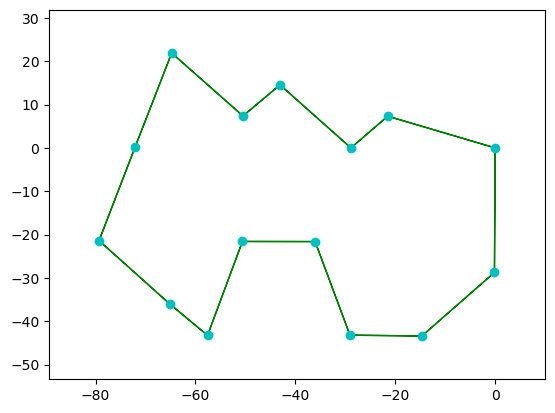

<Figure size 1500x1000 with 0 Axes>

In [38]:
coords = data
sa = SimAnneal(coords, stopping_iter=1000)
sa.anneal()
sa.visualize_routes()